# Explanation

There is no specific function for cropping using OpenCV, NumPy array slicing is what does the job.

In Python, you crop the image using the same method as NumPy array slicing. 

To slice an array, you need to specify the start and end index of the first as well as the second dimension. 

   - The first dimension is always the number of rows or the height of the image.
   - The second dimension is the number of columns or the width of the image. 
   
   > cropped = img[start_row:end_row, start_col:end_col]
   
   An easier way of seeing it:
   
   > crop_img = src_img[h_start : h_end, w_start : w_end]



### Alternatively
https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python


If we consider (0,0) as top left corner of image called im with left-to-right as x direction and top-to-bottom as y direction. 

and we have (x1,y1) as the top-left vertex and (x2,y2) as the bottom-right vertex of a rectangle region within that image, then:

>roi = im[y1:y2, x1:x2]


##### How to determine the coordinates?
https://www.pyimagesearch.com/2021/01/19/crop-image-with-opencv/

Coordinates were determined using photo editing software such as Photoshop, GIMP, Paint, etc

###### Alternative way of displaying the coordinates
https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/


ALTERNATIVE METHOD
https://medium.com/@khandelwalprateek01/how-to-select-roi-in-jupyter-notebook-309fe5185a54

This method works much better for large images. The code with "ROI openCV" doesn't work well with images of 6K by 6K.. only with 2K by 2K

In [1]:
# Import packages
import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
import cv2

In [20]:
# Reading the original image to crop
path  = "/Users/lucia/Desktop/Escher_Project/00-CODIGOS/0000-Cris_Luengo/00-Latest_code-Lucia/Test/"
fname = '0_half_size.png'
img_raw  = cv2.imread(path+fname)

im = plt.imread(path+fname)

In [2]:
class bbox_select():
    %matplotlib notebook 


    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)


        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)


### Select region and show coordinates on image

Double click on the points and it will join them, when finished, click on "disconnect.."


<IPython.core.display.Javascript object>


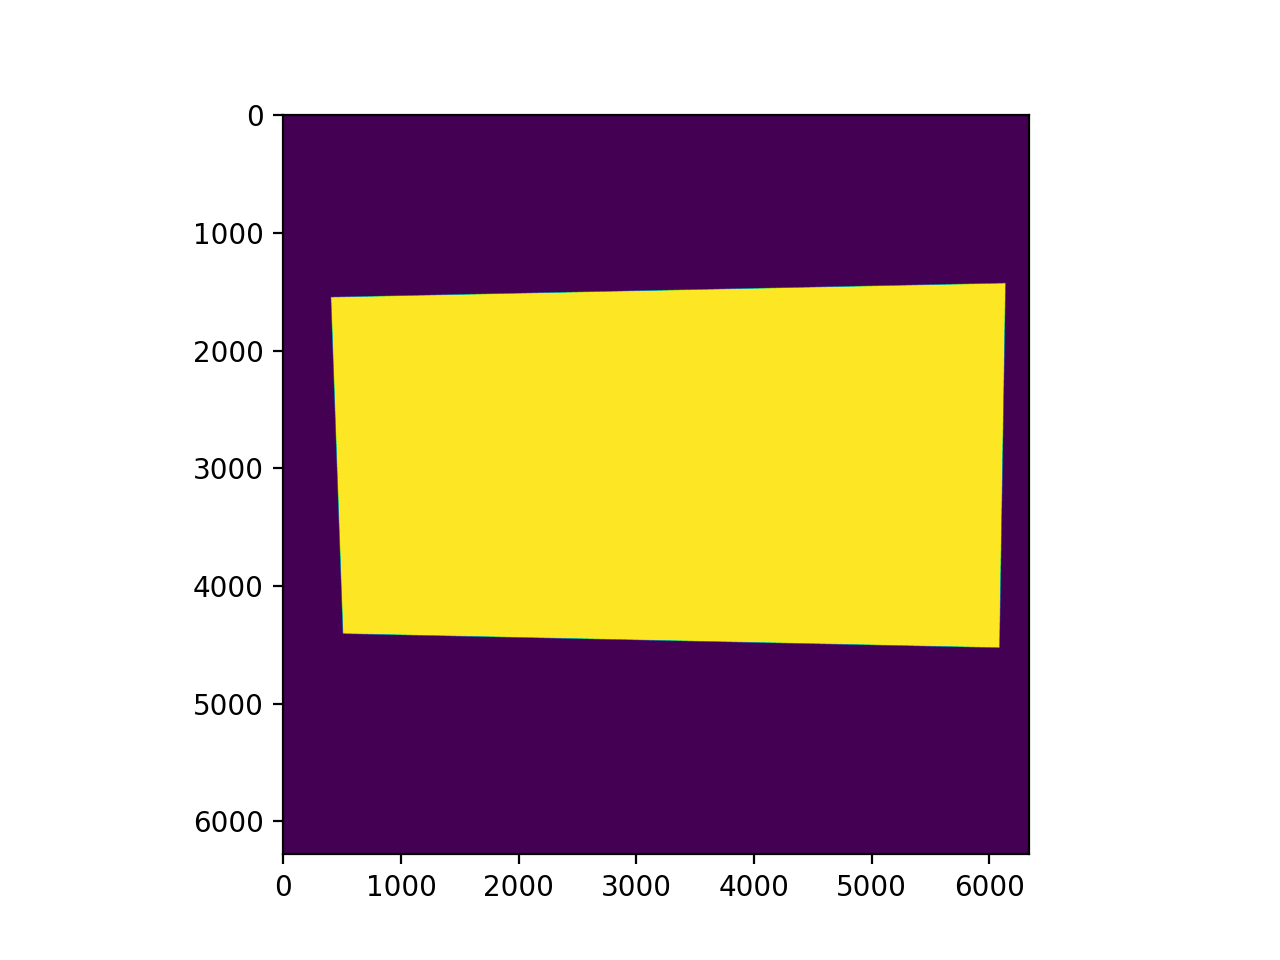

Button(description='Disconnect mpl', style=ButtonStyle())

In [10]:
bs = bbox_select(im)

### Create mask on the selected points 
it looks like it is covering the original img with a black mask (not cutting the img)

In [ ]:
arr = np.array([bs.selected_points],'int')
mask = cv2.fillPoly(np.zeros(im.shape,np.uint8),arr,[1,1,1])
op = np.multiply(im,mask)
plt.imshow(mask)

### Crop the image using the selected coordinates

Here I will do something different than the script

The script crops any region with any shape

I am cutting a box, so I am passing diagonal axis

roi = (Xtop_left, Ytop_left, Xright_down, Yright_down)

In [28]:
roi = (164,1409,6235,3400) 
roi_cropped = img_raw[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
cv2.imwrite("crop.png",roi_cropped)
#cv2.imshow("ROI", roi_cropped)

True

In [2]:
# Mirror an image
# https://medium.com/analytics-vidhya/image-flipping-and-mirroring-with-numpy-and-opencv-aecc08558679

def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_rgb = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_rgb = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_rgb

def mirror_this(image_file, gray_scale=False, with_plot=False):
    # read image
    image_rgb    = read_this(image_file=image_file, gray_scale=gray_scale)
    # mirror image
    image_mirror = np.fliplr(image_rgb)
    # concatenate original and mirrored horizontally
    im_h = cv2.hconcat([image_rgb, image_mirror]) 
    
    # save 
    cv2.imwrite('hconcat.png', im_h)


### Inpaint the Cropped Region

I cropped the region even further with the snipping tool. But it can be done with the initial cropping 

In [3]:
# Generate mirrored images

# Read cropped image
path  = "/Users/lucia/Desktop/Escher_Project/00-CODIGOS/Utility_Codes/"
fname = 'crop.png'


# Paste side by side - save it as 'hconcat.png'
# Keep the shape of the cropped image as I'll need it to resize ==> NOT FOR NOW!
cropShape = mirror_this(image_file=path+fname, with_plot=True)


In [ ]:
# Reading the INPAINTED image to MERGE
path  = "/Users/lucia/Desktop/Escher_Project/00-CODIGOS/0000-Cris Luengo/00-Latest_code-Lucia/Results/LaMa2048/Input/"
fname = 'inpainted.png'
img_raw  = cv2.imread(path+fname)

### Here go to LaMa and inpaint to soften borders

In [ ]:
#Paste a ROI into the previously selected region
img[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])] = region 